# Description:
In this notebook the application of frequency windows via NuRadioMC is explored and toyed around with.

# Import modules:

In [1]:
import numpy as np
import scipy as sc
import scipy.fft as scfft
import matplotlib.pyplot as plt
import uproot
import datetime as dt
from datetime import datetime
import csv
#from datetime import datetime

In [2]:
%%capture out
%run /mnt/c/Users/Jethro/Desktop/Master\ Thesis/Functions.ipynb
%run /mnt/c/Users/Jethro/Desktop/RNO-G/GalaxyFunctions.ipynb
#%matplotlib widget

# Import data

In [3]:
import NuRadioReco.modules.channelGalacticNoiseSpectrum
from NuRadioReco.detector import detector
from NuRadioReco.utilities import units
from NuRadioReco.framework import event,station, channel
GNDetector = detector.Detector(json_filename = "/mnt/c/Users/Jethro/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Python 3.8/NuRadioMC/NuRadioReco/detector/RNO_G/RNO_season_2021.json")
GNDetector.update(datetime(2022, 10, 1)) #date in example
GNEvent=event.Event(532,206)
GNStation=station.Station(22)
GNStation.set_station_time(datetime(2022, 10, 1))
GNChannel=channel.Channel(13)
GNChannel.set_trace(trace=np.zeros(2048), sampling_rate=3.2 * units.GHz)
GNStation.add_channel(GNChannel) 

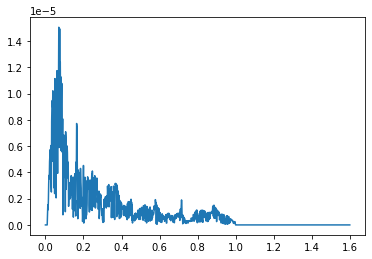

In [8]:
channelGalacticNoiseAdder = NuRadioReco.modules.channelGalacticNoiseSpectrum.channelGalacticNoiseAdder()
channelGalacticNoiseAdder.begin(debug=False,n_side=4,interpolation_frequencies=np.arange(10 * units.MHz, 1100 * units.MHz,100*units.MHz))
GalacticNoiseSpectrum=channelGalacticNoiseAdder.run(GNEvent,GNStation,GNDetector,passband=[10 * units.MHz, 1000 * units.MHz])

plt.figure()
plt.plot(GNChannel.get_frequencies(),np.abs(GalacticNoiseSpectrum))
plt.show()

In [5]:
[10 * units.MHz, 1000 * units.MHz]

[0.01, 1.0]

In [6]:
units.MHz

0.001

In [7]:
units.m

1